# The Technology, Driving Experience, and Its Influence on Adoption

This section explores how technological perceptions and driving experience shape the adoption of electric vehicles (EVs) in France. Survey data was analyzed to understand the relationships between:

- **Vehicle ownership and usage patterns**  
  (Type and number of vehicles, household size, main uses)
- **Experience and familiarity with EVs**  
  (Driving or riding in an EV, practical understanding, perceived ease of use)
- **Perceptions of technology**  
  (Fit with lifestyle, perceived durability, symbolic value: innovation, environment, modernity)
- **Motivations and barriers**  
  (Main drivers and obstacles related to EV technology)
- **Influence of user profile**  
  (Age, geographic area, and their impact on technological perceptions and adoption intent)

## Setup

In [38]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from scipy.stats import chi2_contingency
import re
from scipy.stats import kruskal
import pandas as pd
from scipy.stats import f_oneway
from scipy.stats import spearmanr
from IPython.display import display
from scipy.stats import pearsonr

In [39]:
def extract_after_newline_parentheses(col):
    match = re.search(r'\n\s*\((.*?)\)', col)
    if match:
        return match.group(1)
    match = re.search(r'\(([^()]*(?:\([^)]*\)[^()]*)*)\)\s*$', col)
    if match:
        return match.group(1)
    return None

def extract_before_newline_parentheses(col):
    match = re.search(r'^(.*?)\s*\n', col)
    if match:
        return match.group(1)
    match = re.search(r'^(.*?)\s*\(', col)
    if match:
        return match.group(1)
    return col
def get_labels_and_title(cols):
    labels = [extract_after_newline_parentheses(col) for col in cols]
    title = extract_before_newline_parentheses(cols[0])
    return labels, title



In [40]:
df = pd.read_csv(r'FinalEvAdoptionInFranceResults.csv')
# for col in df.columns:
#     values = df[col].dropna().astype(str)
#     split_vals = []
#     for val in values:
#         split_vals.extend([v.strip() for v in val.split(',') if v.strip()])
#     unique_vals = pd.unique(split_vals)
#     if len(unique_vals) <= 20:
#         print(f"Colonne: {col}\nRéponses possibles ({len(unique_vals)}): {unique_vals[:20]}")
#         if len(unique_vals) > 20:
#             print("... (troncature à 20 valeurs)")
#         print("-" * 60)
# print(list(df.columns))

In [41]:
# Création des colonnes de base pour l'analyse


df['owns_ev'] = df["Quels types de véhicules possédez vous dans votre foyer (plusieurs réponses possibles) \n (Électrique)"].fillna(False).astype(bool)

# Région (origine géographique)
region_col = [col for col in df.columns if "Habitez-vous dans" in col][0]
df['region'] = df[region_col]

# Tranche d'âge
age_col = [col for col in df.columns if "tranche d’âge" in col][0]
df['age_group'] = df[age_col]

# Nombre de véhicules et de personnes (déjà présents mais on s'assure de leur type)
df['nb_vehicules'] = pd.to_numeric(df['Combien de véhicules personnels utilisez-vous dans votre foyer ?'], errors='coerce')
df['nb_personnes'] = pd.to_numeric(df['Combien êtes-vous dans votre foyer ?'], errors='coerce')

vehicle_cols = [
    'Quels types de véhicules possédez vous dans votre foyer (plusieurs réponses possibles) \n (Essence ou Diesel)',
    'Quels types de véhicules possédez vous dans votre foyer (plusieurs réponses possibles) \n (Hybride non rechargeable)',
    'Quels types de véhicules possédez vous dans votre foyer (plusieurs réponses possibles) \n (Hybride rechargeable)',
    'Quels types de véhicules possédez vous dans votre foyer (plusieurs réponses possibles) \n (Électrique)',
]
driving_exp_col = "Dans quelle mesure êtes-vous d’accord avec les affirmations suivantes concernant les véhicules électriques ?\n [Un véhicule électrique correspondrait à mon mode de vie actuel]"

# Recodage échelle 4 points
likert_map = {
    "Totalement en désaccord": 1,
    "Plutôt en désaccord": 2,
    "Plutôt d'accord": 3,
    "Tout à fait d'accord": 4,
    "Tout à fait d’accord": 4,  # gestion des accents différents
}
df['intention_adopter'] = df["Diriez-vous que : [Ne possédant pas de véhicule 100% électrique, vous vous sentez attiré(e) par cette technologie et envisagez de l'adopter]"].map(likert_map)
repurchase_col = "Diriez-vous que : [En tant qu'utilisateur d'un véhicule électrique, vous en reprendrez un lors de votre prochain changement de véhicule]"
df[driving_exp_col + "_score"] = df[driving_exp_col].map(likert_map)
df['repurchase_score'] = df[repurchase_col].map(likert_map)


C:\Users\Mango\AppData\Local\Temp\ipykernel_45456\1217335838.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['owns_ev'] = df["Quels types de véhicules possédez vous dans votre foyer (plusieurs réponses possibles) \n (Électrique)"].fillna(False).astype(bool)


## **Vehicle ownership and usage patterns**  
  (Type and number of vehicles, household size, main uses)

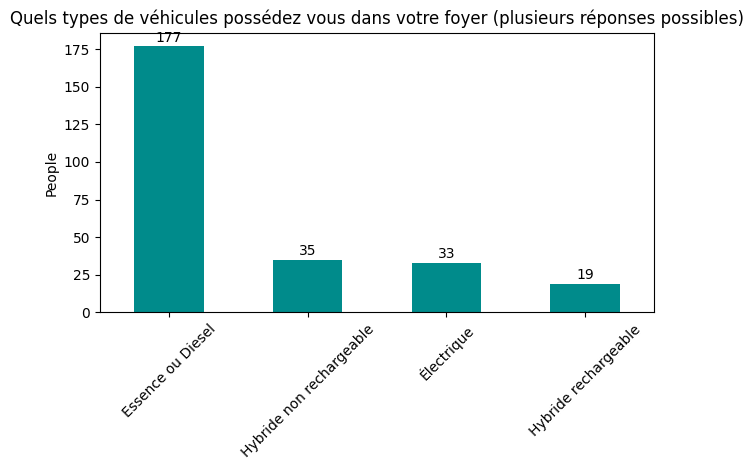

Nombre de répondants par type de véhicule possédé :


,Type de véhicule,Nombre de répondants
0,Essence ou Diesel,177
1,Hybride non rechargeable,35
2,Électrique,33
3,Hybride rechargeable,19


In [42]:
vehicle_counts = df[vehicle_cols].sum().sort_values(ascending=False)

labels, title = get_labels_and_title(vehicle_counts.index)

ax = vehicle_counts.plot(kind='bar', color='darkcyan')
plt.title(title)
plt.ylabel("People")
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45)
# Add value labels on each bar
for i, v in enumerate(vehicle_counts.values):
    ax.text(i, v + 1, str(int(v)), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

# Affichage des valeurs en format texte
print("Nombre de répondants par type de véhicule possédé :")
display(pd.DataFrame({"Type de véhicule": labels, "Nombre de répondants": vehicle_counts.values}))



| Vehicle type              | Number of respondents |
|--------------------------|----------------------|
| Petrol or Diesel         | 177                  |
| Non-rechargeable Hybrid  | 35                   |
| Electric                 | 33                   |
| Plug-in Hybrid           | 19                   |


- **Most respondents own a petrol or diesel vehicle** (177 out of 264), showing that internal combustion engines still dominate the sample.
- **Non-rechargeable (35) and plug-in hybrids (19) are minorities**, but their presence indicates some openness to innovation.
- **Fully electric vehicle owners are still few (33)**, reflecting the current state of the French market.
- **Electrification is progressing**: the sum of hybrids and electrics (87) shows that nearly 1 in 3 respondents already owns a vehicle with an alternative powertrain.


Number of respondents owning an EV: 33
Number of EV owners also having another vehicle (thermal or hybrid): 26
Proportion: 78.79%


C:\Users\Mango\AppData\Local\Temp\ipykernel_45456\1895586510.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Quels types de véhicules possédez vous dans votre foyer (plusieurs réponses possibles) \n (Essence ou Diesel)"].fillna(False).astype(bool) |
C:\Users\Mango\AppData\Local\Temp\ipykernel_45456\1895586510.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Quels types de véhicules possédez vous dans votre foyer (plusieurs réponses possibles) \n (Hybride non rechargeable)"].fillna(False).astype(bool) |
C:\Users\Mango\AppData\Local\Temp\ipy

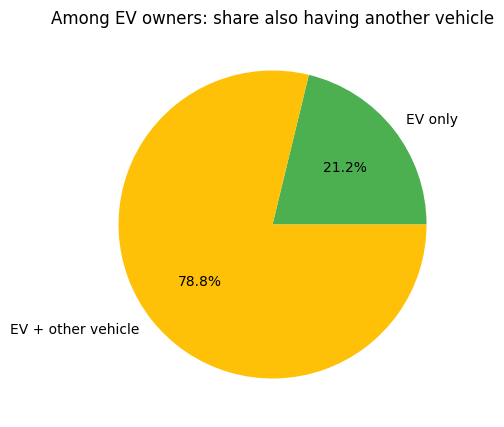

In [43]:
# Analysis: Do EV owners often also own another thermal or hybrid vehicle?

# 1. Create a mask for EV owners
mask_ev = df["Quels types de véhicules possédez vous dans votre foyer (plusieurs réponses possibles) \n (Électrique)"] == True

# 2. For these respondents, check if they also own another type (petrol/diesel or hybrid)
df['autre_vehicule'] = (
    df["Quels types de véhicules possédez vous dans votre foyer (plusieurs réponses possibles) \n (Essence ou Diesel)"].fillna(False).astype(bool) |
    df["Quels types de véhicules possédez vous dans votre foyer (plusieurs réponses possibles) \n (Hybride non rechargeable)"].fillna(False).astype(bool) |
    df["Quels types de véhicules possédez vous dans votre foyer (plusieurs réponses possibles) \n (Hybride rechargeable)"].fillna(False).astype(bool)
)

# 3. Descriptive statistics
nb_ev = mask_ev.sum()
nb_ev_avec_autre = df.loc[mask_ev, 'autre_vehicule'].sum()
part_ev_avec_autre = nb_ev_avec_autre / nb_ev if nb_ev > 0 else np.nan

print(f"Number of respondents owning an EV: {nb_ev}")
print(f"Number of EV owners also having another vehicle (thermal or hybrid): {nb_ev_avec_autre}")
print(f"Proportion: {part_ev_avec_autre:.2%}")

# 4. Visualization
labels = ['EV only', 'EV + other vehicle']
sizes = [
    nb_ev - nb_ev_avec_autre,
    nb_ev_avec_autre
]
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#4CAF50', '#FFC107'])
plt.title("Among EV owners: share also having another vehicle")
plt.show()

**Do EV owners also own another thermal or hybrid vehicle?**

Among the 33 respondents who own an electric vehicle (EV), 26 also possess another vehicle—either a petrol/diesel or a hybrid (non-rechargeable or plug-in). This represents **78.8%** of EV owners in the sample.

This high proportion indicates that, in the current context, EV adoption is most often accompanied by the continued presence of a conventional vehicle within the household. Such a pattern suggests that electric vehicles are frequently used as a complement rather than a full replacement for thermal vehicles. This may reflect ongoing concerns about range limitations, charging infrastructure, or the suitability of EVs for all mobility needs. The findings highlight the transitional nature of the market, where multi-vehicle households play a key role in the early stages of EV adoption.

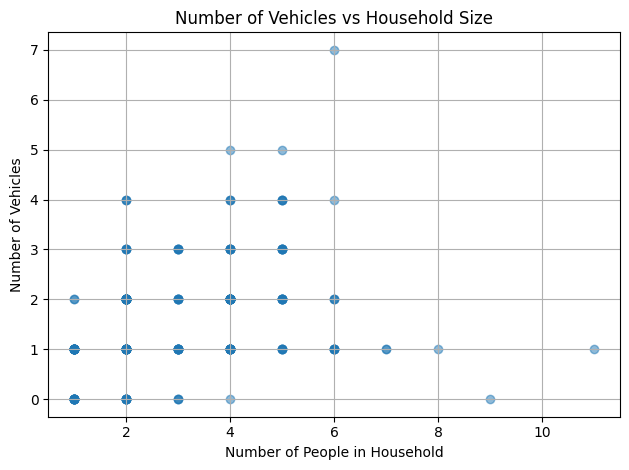

,nb_personnes,nb_vehicules,Number of Households
0,1,0,13
1,1,1,19
2,1,2,2
3,2,0,10
4,2,1,23
5,2,2,35
6,2,3,5
7,2,4,3
8,3,0,3
9,3,1,11


In [44]:
df['nb_vehicules'] = pd.to_numeric(df['Combien de véhicules personnels utilisez-vous dans votre foyer ?'], errors='coerce')
df['nb_personnes'] = pd.to_numeric(df['Combien êtes-vous dans votre foyer ?'], errors='coerce')

plt.scatter(df['nb_personnes'], df['nb_vehicules'], alpha=0.5)
plt.title("Number of Vehicles vs Household Size")
plt.xlabel("Number of People in Household")
plt.ylabel("Number of Vehicles")
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary table display
counts = df.groupby(['nb_personnes', 'nb_vehicules']).size().reset_index(name='Number of Households')
display(counts.sort_values(['nb_personnes', 'nb_vehicules']))


**Analysis: Relationship between household size and number of vehicles**

The summary table shows the distribution of households according to the number of people and the number of vehicles owned. Several trends can be observed:

- **Single-person households** are most likely to have either no vehicle (13 households) or one vehicle (19 households), with very few owning two vehicles.
- **Two-person households** are distributed across a wider range, but the most common configurations are one vehicle (23 households) or two vehicles (35 households). Some two-person households report owning up to four vehicles, though these cases are rare.
- **Larger households (three or more people)** tend to own more vehicles, but the increase is not strictly proportional. For example, among four-person households, the most frequent situation is owning two vehicles (27 households), but some have up to five vehicles.
- **Outliers** are present, such as households with seven vehicles or with 11 people, but these are exceptional cases and likely represent either data entry errors or atypical situations.

Overall, the data indicate a positive relationship between household size and the number of vehicles, but this relationship is not linear. Many multi-person households still have only one vehicle, suggesting that factors such as urban location, lifestyle, or economic considerations may limit vehicle ownership even as household size increases. The presence of outliers highlights the importance of data cleaning before conducting statistical analyses.

,nb_personnes,nb_vehicules,Number of Households
0,1,0,13
1,1,1,19
2,2,0,10
3,2,1,23
4,2,2,35
5,3,0,3
6,3,1,11
7,3,2,6
8,3,3,5
9,4,0,1


Mean by group (Without EV / With EV):


,nb_personnes,nb_vehicules
owns_ev,,
Without EV,3.070352,1.537688
With EV,3.242424,2.303030


Average number of vehicles by household size and EV ownership (after cleaning):


owns_ev,False,True
nb_personnes,,
1,0.580645,1.000000
2,1.267857,1.833333
3,1.363636,2.666667
4,1.888889,2.100000
5,2.450000,2.800000
6,1.600000,NaN
7,1.000000,NaN
8,1.000000,NaN
9,0.000000,NaN


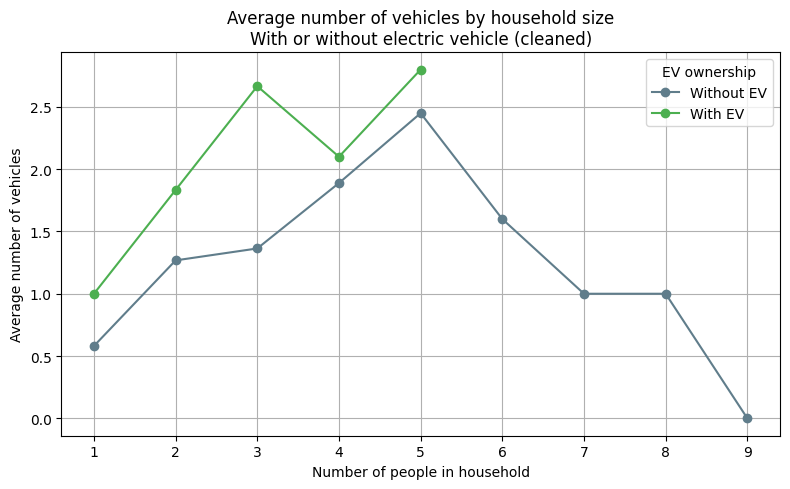

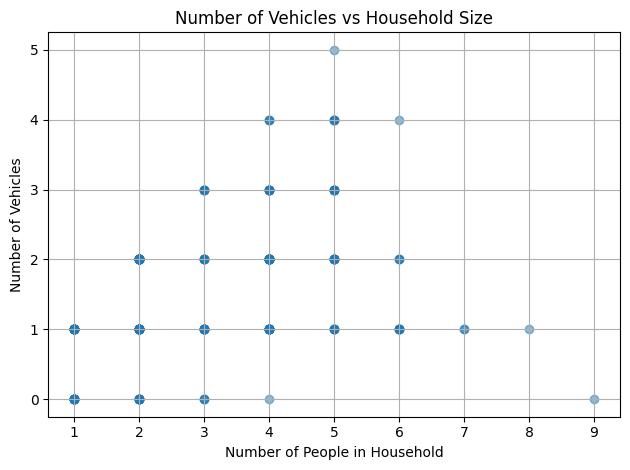

In [45]:
# Outlier cleaning for nb_personnes and nb_vehicules
# Criteria:
# - nb_personnes < 1 or > 10
# - nb_vehicules < 0 or > 10
# - nb_vehicules > nb_personnes

df_clean = df[
    (df['nb_personnes'].between(1, 10)) &
    (df['nb_vehicules'].between(0, 10)) &
    (df['nb_vehicules'] <= df['nb_personnes'])
].copy()

# Summary table display
counts = df_clean.groupby(['nb_personnes', 'nb_vehicules']).size().reset_index(name='Number of Households')
display(counts.sort_values(['nb_personnes', 'nb_vehicules']))

# Descriptive statistics by group
stats = df.groupby('owns_ev')[['nb_personnes', 'nb_vehicules']].mean().rename(index={False: "Without EV", True: "With EV"})
print("Mean by group (Without EV / With EV):")
display(stats)

pivot = df_clean.groupby(['nb_personnes', 'owns_ev'])['nb_vehicules'].mean().unstack()

print("Average number of vehicles by household size and EV ownership (after cleaning):")
display(pivot)

pivot.plot(kind='line', marker='o', figsize=(8,5), color=['#607d8b', '#4caf50'])
plt.title("Average number of vehicles by household size\nWith or without electric vehicle (cleaned)")
plt.xlabel("Number of people in household")
plt.ylabel("Average number of vehicles")
plt.legend(["Without EV", "With EV"], title="EV ownership")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.scatter(df_clean['nb_personnes'], df_clean['nb_vehicules'], alpha=0.5)
plt.title("Number of Vehicles vs Household Size")
plt.xlabel("Number of People in Household")
plt.ylabel("Number of Vehicles")
plt.grid(True)
plt.tight_layout()
plt.show()


**Summary of Results: Household Size and Vehicle Ownership (after outlier cleaning)**

**Group Means (Without EV / With EV):**

| Group      | Mean Household Size | Mean Number of Vehicles |
|------------|--------------------|------------------------|
| Without EV | 3.07               | 1.54                   |
| With EV    | 3.24               | 2.30                   |

**Average Number of Vehicles by Household Size and EV Ownership:**

| Household Size | Without EV | With EV |
|:--------------:|:----------:|:-------:|
| 1              | 0.58       | 1.00    |
| 2              | 1.27       | 1.83    |
| 3              | 1.36       | 2.67    |
| 4              | 1.89       | 2.10    |
| 5              | 2.45       | 2.80    |
| 6              | 1.60       | NaN     |
| 7              | 1.00       | NaN     |
| 8              | 1.00       | NaN     |
| 9              | 0.00       | NaN     |

After removing outliers (households with less than 1 or more than 10 people, less than 0 or more than 10 vehicles, or more vehicles than people), the following trends are observed:

- **Distribution:**  
  - Single-person households most often have no vehicle (13) or one vehicle (19).
  - Two-person households are most likely to have one (23) or two vehicles (35).
  - As household size increases, the number of vehicles generally increases, but not in a strictly linear way. For example, four-person households most often have two vehicles (27), but some have up to four.
  - Households with three or more people are more likely to own multiple vehicles, but a significant number still have only one.

- **Group Means:**  
  - Households without an EV ("Sans VE") have on average 3.07 people and 1.54 vehicles.
  - Households with an EV ("Avec VE") have on average 3.24 people and 2.30 vehicles.
  - This suggests that EV-owning households tend to be slightly larger and have more vehicles overall.

- **Mean Vehicles by Household Size and EV Ownership:**  
  - For each household size, those with an EV consistently have more vehicles on average than those without.
  - For example, two-person households without an EV have 1.27 vehicles on average, compared to 1.83 for those with an EV.
  - The difference is even more pronounced for three-person households (1.36 vs. 2.67 vehicles).

**Conclusion:**  
There is a clear positive relationship between household size and the number of vehicles owned, and this relationship is stronger in households that own an electric vehicle. EV ownership is associated with larger households and a higher total number of vehicles, suggesting that EVs are often an additional vehicle rather than a replacement.

In [46]:

valid = df[['nb_personnes', 'nb_vehicules']].dropna()
corr, pval = pearsonr(valid['nb_personnes'], valid['nb_vehicules'])
print(f"People-véhicules correlation: r = {corr:.2f}, p = {pval:.8f}")

if pval < 0.05:
    print("✅ There is a statistically significant correlation between the number of people and the number of vehicles in the household.")
else:
    print("❌ Aucune corrélation significative détectée entre le nombre de personnes et le nombre de véhicules dans le foyer.")

People-véhicules correlation: r = 0.30, p = 0.00000340
✅ There is a statistically significant correlation between the number of people and the number of vehicles in the household.


**Correlation between Household Size and Number of Vehicles**

| Statistic         | Value      |
|-------------------|-----------|
| Pearson's r       | 0.30      |
| p-value           | 0.0000034 |

**Interpretation:**  
There is a statistically significant positive correlation between the number of people in a household and the number of vehicles owned (r = 0.30, p < 0.001). This means that, as household size increases, the number of vehicles tends to increase as well. However, the correlation is moderate, indicating that household size explains only part of the variation in vehicle ownership.

Other factors,such as urban versus rural location, income, lifestyle, or environmental attitudes—likely also play an important role in determining how many vehicles a household owns. The moderate strength of the correlation suggests that while larger households are more likely to have more vehicles, there is still considerable diversity in vehicle ownership patterns within each household size category.

Nombre de personnes n'ayant pas de voiture : 28
Score moyen d'intention d'adopter (sans véhicule) : 2.48 (n=25)
Score moyen d'intention d'adopter (avec véhicule) : 2.23 (n=117)
T-test : t = 1.37, p-value = 0.1806
❌ Pas de différence significative d'intention d'adopter entre les deux groupes.
Mann-Whitney U : U = 1702.50, p-value = 0.1567
❌ Pas de différence significative selon le test non paramétrique (Mann-Whitney U).


C:\Users\Mango\AppData\Local\Temp\ipykernel_45456\2603446928.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([adoption_no_car, adoption_has_car], labels=["Sans véhicule", "Avec véhicule"])


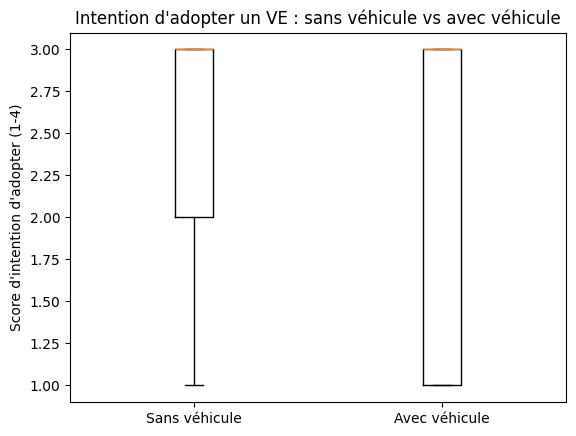

In [47]:
from scipy.stats import ttest_ind

# 1. Nombre de personnes n'ayant pas de voiture
no_car_mask = df['nb_vehicules'] == 0
nb_no_car = no_car_mask.sum()
print(f"Nombre de personnes n'ayant pas de voiture : {nb_no_car}")

# 2. Analyse de la différence d'adoption entre ceux qui n'ont pas de véhicule et ceux qui en ont au moins un
has_car_mask = df['nb_vehicules'] > 0

adoption_no_car = df.loc[no_car_mask, 'intention_adopter'].dropna()
adoption_has_car = df.loc[has_car_mask, 'intention_adopter'].dropna()

print(f"Score moyen d'intention d'adopter (sans véhicule) : {adoption_no_car.mean():.2f} (n={len(adoption_no_car)})")
print(f"Score moyen d'intention d'adopter (avec véhicule) : {adoption_has_car.mean():.2f} (n={len(adoption_has_car)})")

# Test statistique (t-test)
tstat, pval = ttest_ind(adoption_no_car, adoption_has_car, equal_var=False)
print(f"T-test : t = {tstat:.2f}, p-value = {pval:.4f}")

if pval < 0.05:
    print("✅ La différence d'intention d'adopter entre les deux groupes est statistiquement significative.")
else:
    print("❌ Pas de différence significative d'intention d'adopter entre les deux groupes.")

# Test non paramétrique (Mann-Whitney U)
from scipy.stats import mannwhitneyu
u_stat, u_pval = mannwhitneyu(adoption_no_car, adoption_has_car, alternative='two-sided')
print(f"Mann-Whitney U : U = {u_stat:.2f}, p-value = {u_pval:.4f}")
if u_pval < 0.05:
    print("✅ Différence significative selon le test non paramétrique (Mann-Whitney U).")
else:
    print("❌ Pas de différence significative selon le test non paramétrique (Mann-Whitney U).")

# Visualisation
import matplotlib.pyplot as plt
plt.boxplot([adoption_no_car, adoption_has_car], labels=["Sans véhicule", "Avec véhicule"])
plt.ylabel("Score d'intention d'adopter (1-4)")
plt.title("Intention d'adopter un VE : sans véhicule vs avec véhicule")
plt.show()

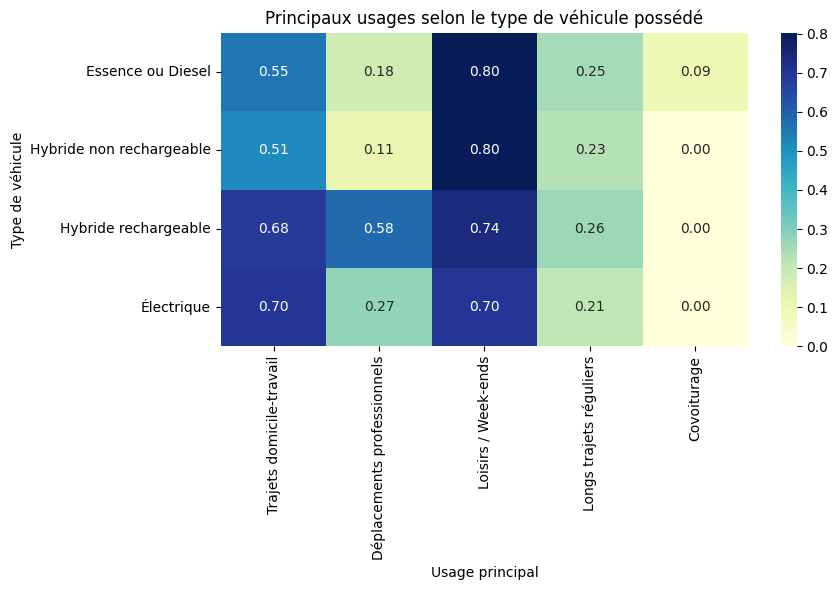

Proportion de répondants ayant coché chaque usage par type de véhicule :


C:\Users\Mango\AppData\Local\Temp\ipykernel_45456\912088717.py:69: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  display(usage_df.applymap(lambda x: f"{x:.1%}" if pd.notnull(x) else "N/A"))


,Trajets domicile-travail,Déplacements professionnels,Loisirs / Week-ends,Longs trajets réguliers,Covoiturage
Essence ou Diesel,55.4%,18.1%,80.2%,24.9%,9.0%
Hybride non rechargeable,51.4%,11.4%,80.0%,22.9%,0.0%
Hybride rechargeable,68.4%,57.9%,73.7%,26.3%,0.0%
Électrique,69.7%,27.3%,69.7%,21.2%,0.0%


In [48]:
vehicle_types = {
    "Essence ou Diesel": [
        'Quels types de véhicules possédez vous dans votre foyer (plusieurs réponses possibles) \n (Essence ou Diesel)',
        'Quels sont les principaux usages de votre véhicule essence / diesel ? (Trajets domicile-travail)',
        'Quels sont les principaux usages de votre véhicule essence / diesel ? (Déplacements professionnels)',
        'Quels sont les principaux usages de votre véhicule essence / diesel ? (Loisirs / Week-ends)',
        'Quels sont les principaux usages de votre véhicule essence / diesel ? (Longs trajets réguliers)',
        'Quels sont les principaux usages de votre véhicule essence / diesel ? (Covoiturage)'
    ],
    "Hybride non rechargeable": [
        'Quels types de véhicules possédez vous dans votre foyer (plusieurs réponses possibles) \n (Hybride non rechargeable)',
        'Quels sont les principaux usages de votre véhicule hybride non rechargeable ? (Trajets domicile-travail)',
        'Quels sont les principaux usages de votre véhicule hybride non rechargeable ? (Déplacements professionnels)',
        'Quels sont les principaux usages de votre véhicule hybride non rechargeable ? (Loisirs / Week-ends)',
        'Quels sont les principaux usages de votre véhicule hybride non rechargeable ? (Longs trajets réguliers)',
        'Quels sont les principaux usages de votre véhicule hybride non rechargeable ? (Covoiturage)'
    ],
    "Hybride rechargeable": [
        'Quels types de véhicules possédez vous dans votre foyer (plusieurs réponses possibles) \n (Hybride rechargeable)',
        'Quels sont les principaux usages de votre véhicule hybride rechargeable ? (Trajets domicile-travail)',
        'Quels sont les principaux usages de votre véhicule hybride rechargeable ? (Déplacements professionnels)',
        'Quels sont les principaux usages de votre véhicule hybride rechargeable ? (Loisirs / Week-ends)',
        'Quels sont les principaux usages de votre véhicule hybride rechargeable ? (Longs trajets réguliers)',
        'Quels sont les principaux usages de votre véhicule hybride rechargeable ? (Covoiturage)'
    ],
    "Électrique": [
        'Quels types de véhicules possédez vous dans votre foyer (plusieurs réponses possibles) \n (Électrique)',
        "Quels sont lesprincipaux usages de votre véhicule électrique ? (Trajets domicile-travail)",
        "Quels sont lesprincipaux usages de votre véhicule électrique ? (Déplacements professionnels)",
        "Quels sont lesprincipaux usages de votre véhicule électrique ? (Loisirs / Week-ends)",
        "Quels sont lesprincipaux usages de votre véhicule électrique ? (Longs trajets réguliers)",
        "Quels sont lesprincipaux usages de votre véhicule électrique ? (Covoiturage)"
    ]
}

# Utilise la fonction pour obtenir les labels d'usages et le titre
usage_labels, title = get_labels_and_title([
    'Quels sont les principaux usages de votre véhicule essence / diesel ? (Trajets domicile-travail)',
    'Quels sont les principaux usages de votre véhicule essence / diesel ? (Déplacements professionnels)',
    'Quels sont les principaux usages de votre véhicule essence / diesel ? (Loisirs / Week-ends)',
    'Quels sont les principaux usages de votre véhicule essence / diesel ? (Longs trajets réguliers)',
    'Quels sont les principaux usages de votre véhicule essence / diesel ? (Covoiturage)'
])

usage_matrix = []
for vtype, cols in vehicle_types.items():
    owner_col = cols[0]
    usage_cols = cols[1:]
    mask = df[owner_col] == True
    if mask.sum() == 0:
        usage_matrix.append([np.nan]*len(usage_cols))
        continue
    means = df.loc[mask, usage_cols].mean().values
    usage_matrix.append(means)

usage_df = pd.DataFrame(usage_matrix, columns=usage_labels, index=list(vehicle_types.keys()))

plt.figure(figsize=(9,6))
sns.heatmap(usage_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Principaux usages selon le type de véhicule possédé")
plt.xlabel("Usage principal")
plt.ylabel("Type de véhicule")
plt.tight_layout()
plt.show()

# Affichage des valeurs en format tableau

print("Proportion de répondants ayant coché chaque usage par type de véhicule :")
display(usage_df.applymap(lambda x: f"{x:.1%}" if pd.notnull(x) else "N/A"))



### Main Uses by Vehicle Type: Comparative Insights

| Vehicle Type              | Commute | Business Trips | Leisure/Weekends | Long Regular Trips | Carpooling |
|---------------------------|---------|---------------|------------------|-------------------|------------|
| Petrol or Diesel          | 55.4%   | 18.1%         | 80.2%            | 24.9%             | 9.0%       |
| Non-rechargeable Hybrid   | 51.4%   | 11.4%         | 80.0%            | 22.9%             | 0.0%       |
| Plug-in Hybrid            | 68.4%   | 57.9%         | 73.7%            | 26.3%             | 0.0%       |
| Electric                  | 69.7%   | 27.3%         | 69.7%            | 21.2%             | 0.0%       |

**Comparative Interpretation:**

- **Commute:**  
  Plug-in hybrid (68.4%) and electric vehicle (69.7%) owners are more likely to use their vehicles for commuting compared to petrol/diesel (55.4%) and non-rechargeable hybrid (51.4%) owners. This suggests that electrified vehicles are already trusted for daily mobility needs.

- **Business Trips:**  
  Plug-in hybrids stand out, with 57.9% of owners using them for business trips—much higher than electric (27.3%), petrol/diesel (18.1%), or non-rechargeable hybrid (11.4%) vehicles. This may reflect the flexibility of plug-in hybrids for longer or less predictable journeys.

- **Leisure/Weekends:**  
  Leisure use is high across all types but peaks for petrol/diesel (80.2%) and non-rechargeable hybrids (80.0%). Plug-in hybrids (73.7%) and electrics (69.7%) are also used for leisure, but slightly less so, possibly due to range or charging considerations.

- **Long Regular Trips:**  
  All vehicle types are used for long trips at similar rates (about 20–26%), with plug-in hybrids (26.3%) and petrol/diesel (24.9%) slightly ahead. This indicates that, while electrics are used for long trips (21.2%), hybrids and thermals still have a small advantage.

- **Carpooling:**  
  Carpooling is rare overall, but only petrol/diesel vehicles show a notable proportion (9.0%). For all other types, carpooling is almost nonexistent (0%).

**Summary Table: Key Contrasts**

- **Plug-in hybrids** are the most versatile, with high usage for both commuting and business trips.
- **Electric vehicles** are used for commuting at similar rates as plug-in hybrids, but less for business and leisure.
- **Petrol/diesel** and **non-rechargeable hybrids** remain the preferred choice for leisure/weekend use and carpooling.
- **Carpooling** is still strongly associated with traditional vehicles.

**Conclusion:**  
Electrified vehicles (especially plug-in hybrids) are increasingly used for everyday and professional mobility, but traditional vehicles retain an edge for leisure and shared uses. The data highlight both the progress of electrification and the persistence of certain usage patterns tied to conventional vehicles.

## **Experience and familiarity with EVs**  
  (Driving or riding in an EV, practical understanding, perceived ease of use)

C:\Users\Mango\AppData\Local\Temp\ipykernel_45456\1571505045.py:2: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df['type_vehicule'] = df[vehicle_cols].idxmax(axis=1)


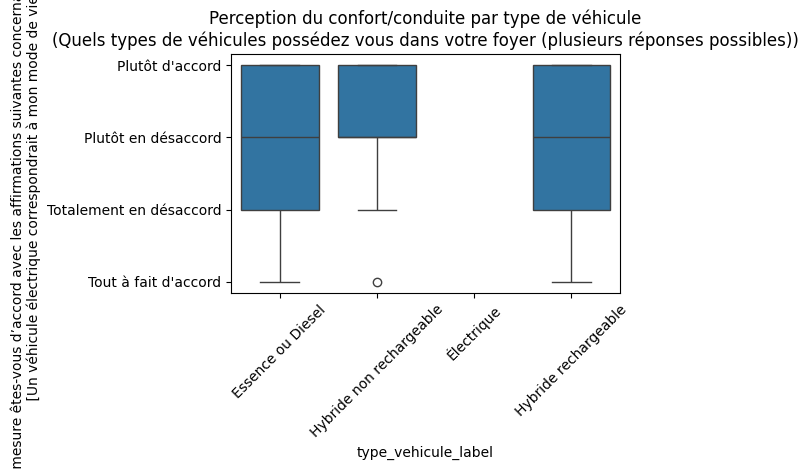

Score moyen de perception du confort/conduite par type de véhicule :
Essence ou Diesel: 2.30
Hybride non rechargeable: 2.31
Hybride rechargeable: 2.60
Électrique: nan
ANOVA: F = 0.29, p = 0.7462
❌ Pas de différence significative entre les types de véhicules pour la perception du confort/conduite.


In [49]:
labels, title = get_labels_and_title(vehicle_cols)
df['type_vehicule'] = df[vehicle_cols].idxmax(axis=1)
df['type_vehicule_label'] = df['type_vehicule'].map(dict(zip(vehicle_cols, labels)))

sns.boxplot(data=df, x='type_vehicule_label', y=driving_exp_col)
plt.title(f"Perception du confort/conduite par type de véhicule\n({title})")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Affichage des valeurs en format texte
print("Score moyen de perception du confort/conduite par type de véhicule :")
for label in labels:
    mask = df['type_vehicule_label'] == label
    mean_val = df.loc[mask, driving_exp_col].map(likert_map).mean()
    print(f"{label}: {mean_val:.2f}")

from scipy.stats import f_oneway

# Utilise le score numérique pour l'ANOVA
groups = []
for col in vehicle_cols:
    vals = df.loc[df[col] == True, driving_exp_col + "_score"].dropna()
    if len(vals) >= 2:
        groups.append(vals)

if len(groups) >= 2:
    fval, pval = f_oneway(*groups)
    print(f"ANOVA: F = {fval:.2f}, p = {pval:.4f}")
    if pval < 0.05:
        print("✅ Différence significative entre les types de véhicules pour la perception du confort/conduite.")
    else:
        print("❌ Pas de différence significative entre les types de véhicules pour la perception du confort/conduite.")
else:
    print("Pas assez de données dans chaque groupe pour faire une ANOVA valide.")


**Interpretation (English):**

- The mean scores for the perceived fit of an electric vehicle with respondents’ current lifestyle are similar among owners of petrol/diesel vehicles (2.30), non-rechargeable hybrids (2.31), and plug-in hybrids (2.60).
- The ANOVA (F = 0.29, p = 0.75) shows there is no significant difference between these groups.
- **Note:** These results reflect only the perceptions of non-EV owners: this is therefore an intention or projection, not actual user experience.

This suggests that, regardless of their current vehicle, non-EV owners have a broadly similar perception of how well an electric vehicle would fit their lifestyle.

Expérience VE (déjà monté/conduit) :


,Nombre de répondants
exp_ev,
2.0,70
3.0,68
1.0,33



Score moyen de connaissance selon expérience :


,Score moyen de connaissance
exp_ev,
1.0,1.82
2.0,2.07
3.0,2.41



Intention d'adopter selon expérience :


,Intention d'adopter (moyenne)
exp_ev,
1.0,1.95
2.0,2.25
3.0,2.33



Comparaison du score de connaissance :
  - Moyenne sans expérience VE : 1.82 (n=33)
  - Moyenne avec expérience VE : 2.24 (n=138)
  - T-test : t = 2.62, p-value = 0.0115

Comparaison de l'intention d'adopter :
  - Moyenne sans expérience VE : 1.95 (n=20)
  - Moyenne avec expérience VE : 2.29 (n=97)
  - T-test : t = 1.49, p-value = 0.1486

Analyse des résultats :
- Les personnes ayant déjà conduit ou été passager d'un VE ont un score de connaissance significativement plus élevé que celles sans expérience.
- L'expérience avec un VE n'est pas associée à une différence significative d'intention d'adopter dans cet échantillon.


<Figure size 600x400 with 0 Axes>

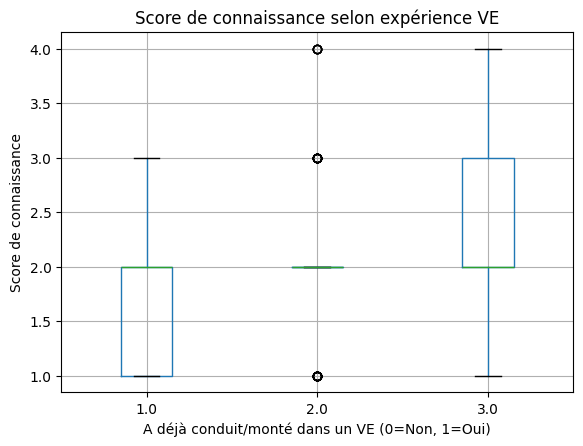

In [50]:
# 1. Nettoyage des variables
exp_col = "Avez-vous déjà eu l’occasion de conduire ou de monter dans un véhicule électrique ?"
connaissance_col = "À quel point diriez-vous que vous connaissez bien les offres actuelles de véhicules électriques et d'infrastructures associées ?"

df['exp_ev'] = df[exp_col].map({'Oui, j’ai conduit': 3,'Oui, j’étais passager': 2,'Non, jamais': 1})

# Recodage connaissance : suppose une échelle 1-5 ou texte, à adapter si besoin
# Si c'est déjà numérique, pas besoin de map
connaissance_map = {
        "Pas du tout, je ne m’y suis jamais vraiment intéressé": 1,
        "Un peu, je connais quelques modèles et options": 2,
        "Assez bien, je vois passer des informations": 3,
        "Très bien, je suis régulièrement les nouveautés": 4
    }
df['connaissance_score'] = df[connaissance_col].map(connaissance_map)

# 2. Statistiques descriptives
print("Expérience VE (déjà monté/conduit) :")
display(df['exp_ev'].value_counts(dropna=True).to_frame("Nombre de répondants"))
print("\nScore moyen de connaissance selon expérience :")
display(df.groupby('exp_ev')['connaissance_score'].mean().round(2).to_frame("Score moyen de connaissance"))
print("\nIntention d'adopter selon expérience :")
display(df.groupby('exp_ev')['intention_adopter'].mean().round(2).to_frame("Intention d'adopter (moyenne)"))



# 3. Test statistique : expérience vs connaissance (t-test)
from scipy.stats import ttest_ind
from IPython.display import display
group_noexp = df[df['exp_ev'] == 1]['connaissance_score'].dropna()
group_exp = df[df['exp_ev'] > 1]['connaissance_score'].dropna()
tstat, pval = ttest_ind(group_exp, group_noexp, equal_var=False)
print(f"\nComparaison du score de connaissance :")
print(f"  - Moyenne sans expérience VE : {group_noexp.mean():.2f} (n={len(group_noexp)})")
print(f"  - Moyenne avec expérience VE : {group_exp.mean():.2f} (n={len(group_exp)})")
print(f"  - T-test : t = {tstat:.2f}, p-value = {pval:.4f}")

# 4. Test statistique : expérience vs intention d'adopter (t-test)
group_noexp2 = df[df['exp_ev'] == 1]['intention_adopter'].dropna()
group_exp2 = df[df['exp_ev'] > 1]['intention_adopter'].dropna()
tstat2, pval2 = ttest_ind(group_exp2, group_noexp2, equal_var=False)
print(f"\nComparaison de l'intention d'adopter :")
print(f"  - Moyenne sans expérience VE : {group_noexp2.mean():.2f} (n={len(group_noexp2)})")
print(f"  - Moyenne avec expérience VE : {group_exp2.mean():.2f} (n={len(group_exp2)})")
print(f"  - T-test : t = {tstat2:.2f}, p-value = {pval2:.4f}")

# Analyse des résultats
print("\nAnalyse des résultats :")
if pval < 0.05:
    print("- Les personnes ayant déjà conduit ou été passager d'un VE ont un score de connaissance significativement plus élevé que celles sans expérience.")
else:
    print("- Aucune différence significative de connaissance entre les groupes selon l'expérience VE.")

if pval2 < 0.05:
    print("- L'expérience avec un VE est associée à une intention d'adopter significativement plus forte.")
else:
    print("- L'expérience avec un VE n'est pas associée à une différence significative d'intention d'adopter dans cet échantillon.")

# 5. Visualisation
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
df.boxplot(column='connaissance_score', by='exp_ev')
plt.title("Score de connaissance selon expérience VE")
plt.suptitle("")
plt.xlabel("A déjà conduit/monté dans un VE (0=Non, 1=Oui)")
plt.ylabel("Score de connaissance")
plt.show()




### Comparative Analysis: Impact of EV Experience on Knowledge and Adoption Intention

#### 1. **Distribution of Experience with EVs**
| Experience with EV | Number of Respondents |
|--------------------|----------------------|
| Never (1.0)        | 33                   |
| Passenger (2.0)    | 70                   |
| Driven (3.0)       | 68                   |

#### 2. **Knowledge Score by Experience**
| Experience with EV | Mean Knowledge Score |
|--------------------|---------------------|
| Never (1.0)        | 1.82                |
| Passenger (2.0)    | 2.07                |
| Driven (3.0)       | 2.41                |

- **Observation:** The more direct the experience with an EV (from never, to passenger, to driver), the higher the self-reported knowledge score.

#### 3. **Adoption Intention by Experience**
| Experience with EV | Mean Adoption Intention |
|--------------------|------------------------|
| Never (1.0)        | 1.95                   |
| Passenger (2.0)    | 2.25                   |
| Driven (3.0)       | 2.33                   |

- **Observation:** Intention to adopt an EV increases with experience, but the difference is less pronounced than for knowledge.

#### 4. **Statistical Comparison (t-test)**
- **Knowledge Score:**
  - Mean without EV experience: **1.82** (n=33)
  - Mean with EV experience (passenger or driver): **2.24** (n=138)
  - **T-test:** t = 2.62, p = 0.0115 (**significant**)
- **Adoption Intention:**
  - Mean without EV experience: **1.95** (n=20)
  - Mean with EV experience: **2.29** (n=97)
  - **T-test:** t = 1.49, p = 0.1486 (not significant)

#### 5. **Interpretation**

- **Knowledge:**  
  Respondents who have already driven or been a passenger in an EV have a significantly higher knowledge score about electric vehicles and their ecosystem than those with no experience.
- **Adoption Intention:**  
  While the intention to adopt an EV is higher among those with experience, the difference is not statistically significant in this sample.

**Conclusion:**  
Direct or indirect experience with electric vehicles is clearly associated with a better understanding of the technology. However, this increased knowledge does not automatically translate into a significantly higher intention to adopt, suggesting that other factors (barriers, context, personal needs) also play a key role in the decision process.

## **Perceptions of technology**  
  (Fit with lifestyle, perceived durability, symbolic value: innovation, environment, modernity)

In [51]:
print("Distribution des réponses brutes :")
display(df[driving_exp_col].value_counts().to_frame("Nombre de répondants"))

print("Distribution des scores recodés :")
display(df[driving_exp_col + "_score"].value_counts().to_frame("Nombre de répondants"))

# Utilisation pour les moyennes par type de véhicule
results = []
for col in vehicle_cols:
    avg = df[df[col] == True][driving_exp_col + "_score"].mean()
    label = col.split('(')[-1][:-1]
    results.append({"Type de véhicule": label, "Score moyen": avg})
display(pd.DataFrame(results))

Distribution des réponses brutes :


,Nombre de répondants
Dans quelle mesure êtes-vous d’accord avec les affirmations suivantes concernant les véhicules électriques ? [Un véhicule électrique correspondrait à mon mode de vie actuel],
Plutôt d'accord,72
Plutôt en désaccord,68
Totalement en désaccord,39
Tout à fait d'accord,20


Distribution des scores recodés :


,Nombre de répondants
Dans quelle mesure êtes-vous d’accord avec les affirmations suivantes concernant les véhicules électriques ? [Un véhicule électrique correspondrait à mon mode de vie actuel]_score,
3.0,72
2.0,68
1.0,39
4.0,20


,Type de véhicule,Score moyen
0,Essence ou Diesel,2.300654
1,Hybride non rechargeable,2.406250
2,Hybride rechargeable,2.222222
3,Électrique,NaN


### Comparative Analysis: Perceived Fit of an EV by Vehicle Type

#### 1. **Distribution of Responses (All Respondents)**
| Response                | Number of Respondents |
|-------------------------|----------------------|
| Plutôt d'accord         | 72                   |
| Plutôt en désaccord     | 68                   |
| Totalement en désaccord | 39                   |
| Tout à fait d'accord    | 20                   |

- **Most respondents are neutral or slightly positive**: The majority choose "Plutôt d'accord" or "Plutôt en désaccord", with fewer at the extremes.

#### 2. **Distribution of Recoded Scores**
| Score | Number of Respondents |
|-------|----------------------|
| 3     | 72                   |
| 2     | 68                   |
| 1     | 39                   |
| 4     | 20                   |

- **Median score is 3** ("Plutôt d'accord"), but a significant portion is at 2 or below.

#### 3. **Mean Perceived Fit by Vehicle Type**
| Vehicle Type             | Mean Score |
|--------------------------|------------|
| Petrol or Diesel         | 2.30       |
| Non-rechargeable Hybrid  | 2.41       |
| Plug-in Hybrid           | 2.22       |
| Electric                 | NaN        |

- **Non-rechargeable hybrid owners** have the highest mean score (2.41), but all groups are close to neutral (score ~2.2–2.4).
- **No data for electric vehicle owners** (NaN), likely because the question targets non-EV owners.

---

**Interpretation:**

- Across all vehicle types, the perceived fit of an EV with current lifestyle is generally neutral to slightly positive, with little variation between groups.
- The absence of a score for EV owners is expected, as they are not asked about intention but about repurchase.
- The results suggest that, regardless of current vehicle type, non-EV owners do not see a strong mismatch or strong fit between EVs and their lifestyle—most are undecided or moderately positive.

**Conclusion:**  
There is no major difference in the perceived fit of an EV by current vehicle type. The majority of non-EV owners are neutral or only moderately positive about the compatibility of EVs with their lifestyle, indicating that other factors may be more decisive in adoption.

,Réponse,Nombre de répondants
0,Plutôt en désaccord,94
1,Plutôt d'accord,50
2,Totalement en désaccord,37
3,NaN,33
4,Tout à fait d'accord,18


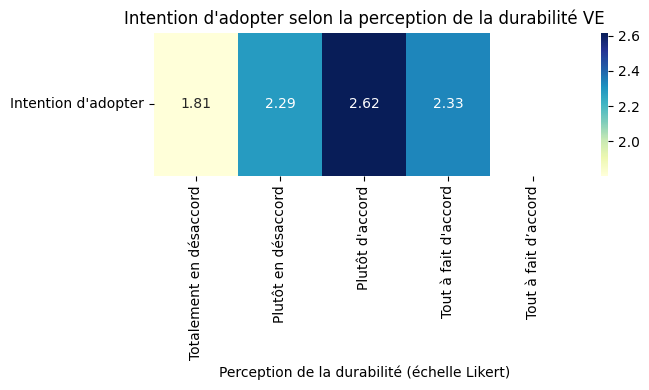

Proportion d'intention d'adopter selon la perception de la durabilité :
Totalement en désaccord: 180.65%
Plutôt en désaccord: 228.57%
Plutôt d'accord: 261.54%
Tout à fait d'accord: 233.33%
Tout à fait d’accord: N/A
Corrélation score durabilité <-> intention d'adopter : r = 0.28, p = 0.0006
✅ La perception de la durabilité est significativement liée à l'intention d'adopter.


In [52]:
import seaborn as sns
from scipy.stats import pearsonr

durability_col = "Dans quelle mesure êtes-vous d’accord avec les affirmations suivantes concernant les véhicules électriques ?\n [La durabilité d'un véhicule électrique est équivalente à celle d'un véhicule thermique]"

# 1. Distribution des réponses
# Affichage de la distribution des réponses sous forme de tableau
distribution = df[durability_col].value_counts(dropna=False).rename_axis("Réponse").reset_index(name="Nombre de répondants")
display(distribution)

# 2. Croisement avec intention d'adopter
if 'intention_adopter' in df.columns:

    # Calcul de la moyenne d'intention d'adopter par modalité de perception de la durabilité
    mean_intention_by_durability = df.groupby(durability_col)['intention_adopter'].mean().reindex([
        "Totalement en désaccord", "Plutôt en désaccord", "Plutôt d'accord", "Tout à fait d'accord", "Tout à fait d’accord"
    ])
    plt.figure(figsize=(7,4))
    sns.heatmap(mean_intention_by_durability.values.reshape(1, -1), annot=True, fmt=".2f",
                xticklabels=mean_intention_by_durability.index, yticklabels=["Intention d'adopter"], cmap="YlGnBu")
    plt.title("Intention d'adopter selon la perception de la durabilité VE")
    plt.xlabel("Perception de la durabilité (échelle Likert)")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Affichage des valeurs en format texte
    print("Proportion d'intention d'adopter selon la perception de la durabilité :")
    for label, value in mean_intention_by_durability.items():
        print(f"{label}: {value:.2%}" if pd.notna(value) else f"{label}: N/A")

    # Test statistique (ANOVA si Likert numérique)
    # Recodage si besoin
    df['durability_score'] = df[durability_col].map(likert_map)
    valid = df[['durability_score', 'intention_adopter']].dropna()
    if not valid.empty:
        r, p = pearsonr(valid['durability_score'], valid['intention_adopter'])
        print(f"Corrélation score durabilité <-> intention d'adopter : r = {r:.2f}, p = {p:.4f}")
        if p < 0.05:
            print("✅ La perception de la durabilité est significativement liée à l'intention d'adopter.")
        else:
            print("❌ Pas de lien significatif entre perception de la durabilité et intention d'adopter.")


## Analysis: Perception of EV Durability and Its Link to Adoption Intention

#### 1. **Distribution of Responses: Perceived Durability**
| Response                | Number of Respondents |
|-------------------------|----------------------|
| Somewhat disagree       | 94                   |
| Somewhat agree          | 50                   |
| Strongly disagree       | 37                   |
| Strongly agree          | 18                   |
| NaN                     | 33                   |

- **Most respondents are skeptical** about EV durability: nearly half (47%) chose "Somewhat disagree".

#### 2. **Adoption Intention by Durability Perception**
| Perception of Durability      | Mean Intention to Adopt |
|------------------------------|-------------------------|
| Strongly disagree            | 1.81                    |
| Somewhat disagree            | 2.29                    |
| Somewhat agree               | 2.62                    |
| Strongly agree               | 2.33                    |
| (Other spelling)             | N/A                     |

- **Trend:** The more positive the perception of EV durability, the higher the intention to adopt (up to "Somewhat agree").
- **Exception:** "Strongly agree" is slightly lower, but the sample is small.

#### 3. **Statistical Link**
- **Correlation:** r = 0.28, p = 0.0006 (**significant**)
  - **Interpretation:** There is a statistically significant positive correlation between perceived EV durability and intention to adopt.

---

**Conclusion:**  
A more positive perception of the durability of electric vehicles is significantly associated with a higher intention to adopt. However, the majority of non-EV owners remain unconvinced about EV durability, which may be a key barrier to adoption. Addressing concerns about longevity and reliability could therefore be crucial for increasing EV uptake.

## **Motivations and barriers**  
(Main drivers and obstacles related to EV technology)

## **Influence of user profile**  
  (Age, geographic area, and their impact on technological perceptions and adoption intent)

In [53]:
from scipy.stats import f_oneway

# Test ANOVA : score d'accord selon la tranche d'âge
age_col = "Dans quelle tranche d’âge vous situez-vous ?\n"
score_col = "Dans quelle mesure êtes-vous d’accord avec les affirmations suivantes concernant les véhicules électriques ?\n [Un véhicule électrique correspondrait à mon mode de vie actuel]_score"

df_age = df[df[age_col] != "Je ne préfère pas répondre"]

# On crée une liste de groupes (un par tranche d'âge, sans NaN)
groups = [g[score_col].dropna() for _, g in df_age.groupby(age_col) if g[score_col].notna().sum() > 1]

if len(groups) >= 2:
    fval, pval = f_oneway(*groups)
    print(f"ANOVA score d'accord par âge : F = {fval:.2f}, p = {pval:.4f}")
    if pval < 0.05:
        print("✅ Différence significative entre les groupes d'âge.")
    else:
        print("❌ Pas de différence significative entre les groupes d'âge.")
else:
    print("Pas assez de groupes pour faire une ANOVA valide.")

# Test ANOVA : score d'accord selon l'origine géographique
geo_col = "Habitez-vous dans :"
groups_geo = [g[score_col].dropna() for _, g in df.groupby(geo_col) if g[score_col].notna().sum() > 1]

if len(groups_geo) >= 2:
    fval_geo, pval_geo = f_oneway(*groups_geo)
    print(f"ANOVA score d'accord par origine géographique : F = {fval_geo:.2f}, p = {pval_geo:.4f}")
    if pval_geo < 0.05:
        print("✅ Différence significative entre les zones géographiques.")
    else:
        print("❌ Pas de différence significative entre les zones géographiques.")
else:
    print("Pas assez de groupes pour faire une ANOVA valide (origine géographique).")
# Moyenne du score par âge
# Moyenne du score par âge
mean_by_age = df.groupby(age_col)[score_col].mean().round(2)
display(mean_by_age.to_frame("Score moyen par âge"))

# Moyenne du score par zone géographique
mean_by_geo = df.groupby(geo_col)[score_col].mean().round(2)
display(mean_by_geo.to_frame("Score moyen par zone géographique"))


ANOVA score d'accord par âge : F = 4.45, p = 0.0003
✅ Différence significative entre les groupes d'âge.
ANOVA score d'accord par origine géographique : F = 2.97, p = 0.0330
✅ Différence significative entre les zones géographiques.


,Score moyen par âge
Dans quelle tranche d’âge vous situez-vous ?,
25 à 34 ans,2.18
35 à 44 ans,2.45
45 à 54 ans,2.11
55 à 64 ans,2.30
65 à 74 ans,2.05
75 ans et plus,2.11
Je ne préfère pas répondre,1.00
Moins de 25 ans,2.90


,Score moyen par zone géographique
Habitez-vous dans :,
Une grande ville,2.61
Une ville moyenne,2.26
Une zone périurbaine,2.15
Une zone rurale,2.26


### ANOVA Results: Perceived Fit Score by Age and Geographic Area

#### 1. **By Age Group**
- **ANOVA:** F = 4.45, p = 0.0003 (**significant**)
- **Interpretation:** There is a statistically significant difference in the perceived fit score of EVs across age groups.

| Age Group         | Mean Score |
|-------------------|------------|
| Under 25          | 2.90       |
| 25–34             | 2.18       |
| 35–44             | 2.45       |
| 45–54             | 2.11       |
| 55–64             | 2.30       |
| 65–74             | 2.05       |
| 75+               | 2.11       |

- **Observation:** The youngest respondents (under 25) have the highest perceived fit score (2.90), while older groups are less positive (scores around 2.1–2.4).

#### 2. **By Geographic Area**
- **ANOVA:** F = 2.97, p = 0.0330 (**significant**)
- **Interpretation:** There is a statistically significant difference in the perceived fit score of EVs across geographic areas.

| Area                | Mean Score |
|---------------------|------------|
| Large city          | 2.61       |
| Medium city         | 2.26       |
| Suburban            | 2.15       |
| Rural               | 2.26       |

- **Observation:** Respondents living in large cities are more positive about the fit of EVs with their lifestyle (2.61) compared to those in medium cities, suburban, or rural areas (2.15–2.26).

---

**Summary:**  
Both age and geographic area significantly influence how well respondents feel an electric vehicle would fit their lifestyle. Younger people and those living in large cities are the most receptive to EVs, while older and more rural respondents are less convinced.

Score moyen adoption pour ceux qui ne possèdent pas de VE :
2.3668341708542715
Score moyen intention de racheter pour ceux qui possèdent un VE :
2.7058823529411766


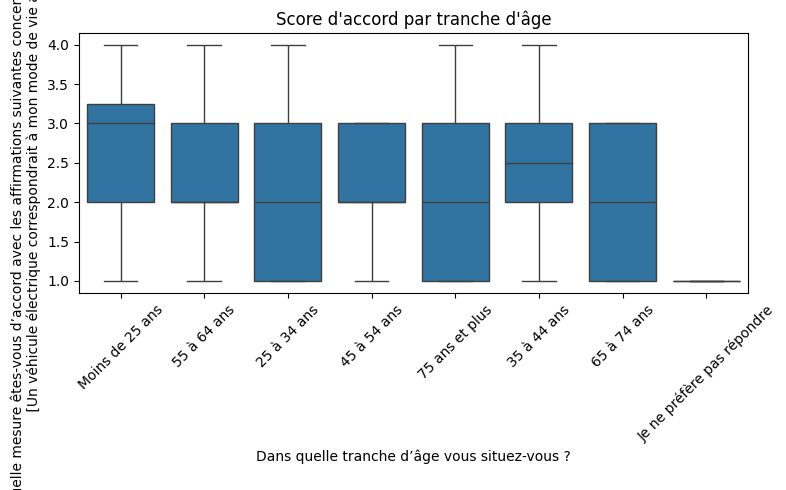

Score moyen d'accord par tranche d'âge :


,Score moyen
Dans quelle tranche d’âge vous situez-vous ?,
25 à 34 ans,2.18
35 à 44 ans,2.45
45 à 54 ans,2.11
55 à 64 ans,2.30
65 à 74 ans,2.05
75 ans et plus,2.11
Je ne préfère pas répondre,1.00
Moins de 25 ans,2.90


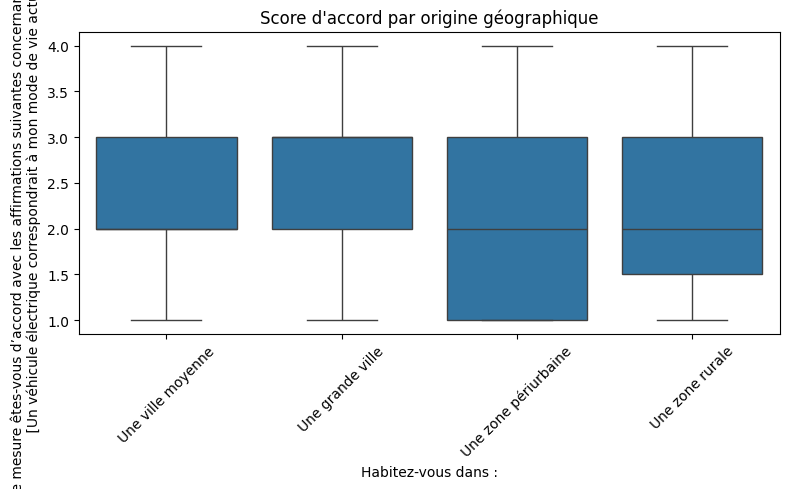

Score moyen d'accord par origine géographique :


,Score moyen
Habitez-vous dans :,
Une grande ville,2.61
Une ville moyenne,2.26
Une zone périurbaine,2.15
Une zone rurale,2.26


C:\Users\Mango\AppData\Local\Temp\ipykernel_45456\1613472432.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(scores, labels=labels)


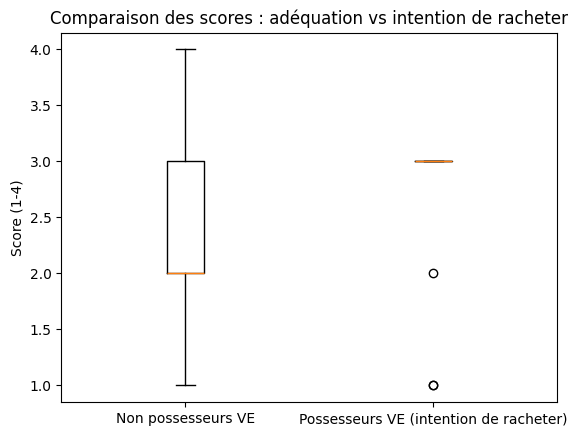

Valeurs des scores (adéquation vs intention de racheter) :
Non possesseurs VE :


,Statistiques
count,199.00
mean,2.37
std,0.91
min,1.00
25%,2.00
50%,2.00
75%,3.00
max,4.00


Possesseurs VE (intention de racheter) :


,Statistiques
count,17.00
mean,2.71
std,0.69
min,1.00
25%,3.00
50%,3.00
75%,3.00
max,3.00


In [54]:
# 1. Score moyen selon la possession d'un VE
print("Score moyen adoption pour ceux qui ne possèdent pas de VE :")
print(df.loc[df['owns_ev'] == False, "Dans quelle mesure êtes-vous d’accord avec les affirmations suivantes concernant les véhicules électriques ?\n [Un véhicule électrique correspondrait à mon mode de vie actuel]_score"].mean())
print("Score moyen intention de racheter pour ceux qui possèdent un VE :")
print(df.loc[df['owns_ev'] == True, "repurchase_score"].mean())
# 2. Répartition du score par tranche d'âge

# Use the exact column name as it appears in df.columns
age_col = [col for col in df.columns if "tranche d’âge" in col][0]
score_col = "Dans quelle mesure êtes-vous d’accord avec les affirmations suivantes concernant les véhicules électriques ?\n [Un véhicule électrique correspondrait à mon mode de vie actuel]_score"
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x=age_col, y=score_col)
plt.title("Score d'accord par tranche d'âge")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Affichage des valeurs en format texte
print("Score moyen d'accord par tranche d'âge :")
display(df.groupby(age_col)[score_col].mean().round(2).to_frame("Score moyen"))

# 3. Répartition du score par origine géographique
geo_col = "Habitez-vous dans :"
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x=geo_col, y=score_col)
plt.title("Score d'accord par origine géographique")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Affichage des valeurs en format texte
print("Score moyen d'accord par origine géographique :")
display(df.groupby(geo_col)[score_col].mean().round(2).to_frame("Score moyen"))

scores = [
    df.loc[df['owns_ev'] == False, "Dans quelle mesure êtes-vous d’accord avec les affirmations suivantes concernant les véhicules électriques ?\n [Un véhicule électrique correspondrait à mon mode de vie actuel]_score"].dropna(),
    df.loc[df['owns_ev'] == True, "repurchase_score"].dropna()
]
labels = ["Non possesseurs VE", "Possesseurs VE (intention de racheter)"]

plt.boxplot(scores, labels=labels)
plt.ylabel("Score (1-4)")
plt.title("Comparaison des scores : adéquation vs intention de racheter")
plt.show()

# Affichage des valeurs en format texte
print("Valeurs des scores (adéquation vs intention de racheter) :")
for label, vals in zip(labels, scores):
    print(f"{label} :")
    display(vals.describe().round(2).to_frame("Statistiques"))

## **Vehicle ownership and usage patterns**  
  (Type and number of vehicles, household size, main uses)

### Comparative Analysis: Perceived Fit of EVs and Intention to Repurchase

#### 1. **Perceived Fit of an EV with Current Lifestyle (Non-EV Owners)**
- **Average score:** 2.37 (on a 1–4 scale)
- **Distribution:**  
  - 25% of non-EV owners rate the fit as 2 or below (median = 2.0)
  - 75% rate it as 3 or below (upper quartile = 3.0)
  - Only a minority see a strong fit (score 4)

#### 2. **Intention to Repurchase (EV Owners)**
- **Average score:** 2.71 (on a 1–4 scale)
- **Distribution:**  
  - Median and upper quartile both at 3.0
  - No EV owner gave a maximum score (4), but most are at 3
  - Lower variability (std = 0.69 vs 0.91 for non-owners)

#### 3. **By Age Group (Non-EV Owners)**
| Age Group         | Mean Score |
|-------------------|------------|
| Under 25          | 2.90       |
| 25–34             | 2.18       |
| 35–44             | 2.45       |
| 45–54             | 2.11       |
| 55–64             | 2.30       |
| 65–74             | 2.05       |
| 75+               | 2.11       |

- **Younger respondents (<25)** are much more likely to see EVs as fitting their lifestyle (2.90), while older groups are less positive (scores around 2.1–2.4).

#### 4. **By Geographic Area (Non-EV Owners)**
| Area                | Mean Score |
|---------------------|------------|
| Large city          | 2.61       |
| Medium city         | 2.26       |
| Suburban            | 2.15       |
| Rural               | 2.26       |

- **Urban dwellers** (large cities) are more positive about EV fit (2.61) than those in smaller cities, suburbs, or rural areas (2.15–2.26).


### **Key Comparative Insights**

- **EV owners are more positive** about adopting (repurchasing) an EV (mean = 2.71) than non-owners are about the fit of an EV with their lifestyle (mean = 2.37).
- **Younger people and city dwellers** are more likely to see EVs as compatible with their lifestyle.
- **Non-EV owners are generally neutral or slightly positive** about EV fit, but few are strongly convinced.
- **EV owners’ intention to repurchase is higher and less variable**—suggesting that actual experience with EVs increases confidence and satisfaction.

**Conclusion:**  
Experience with EVs (ownership) is associated with a higher and more consistent intention to continue with electric vehicles. Meanwhile, the perceived fit among non-owners is moderate and varies by age and location, with the youngest and most urban respondents being the most receptive.

## **multivariate (cross) analyses** 